In [383]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score

In [342]:
data = pd.read_csv('train.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [343]:
data.shape

(614, 13)

In [344]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


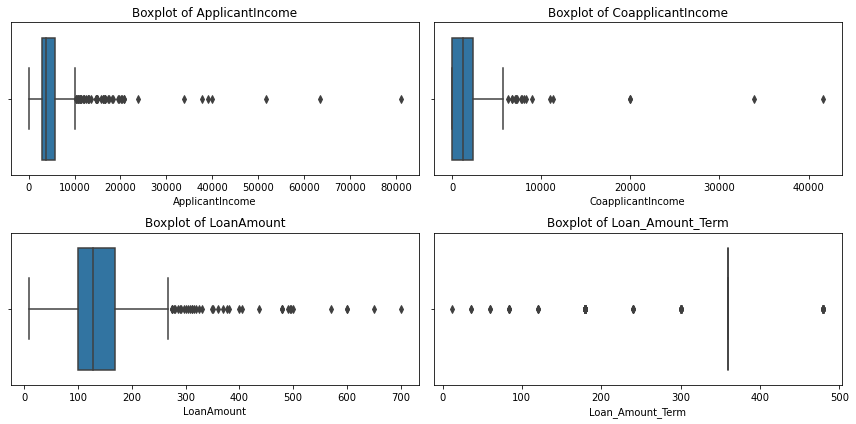

In [345]:
numeric_columns = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]

# Create box plots to visualize potential outliers
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


In [346]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [347]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [348]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mean())

In [349]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [350]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [351]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


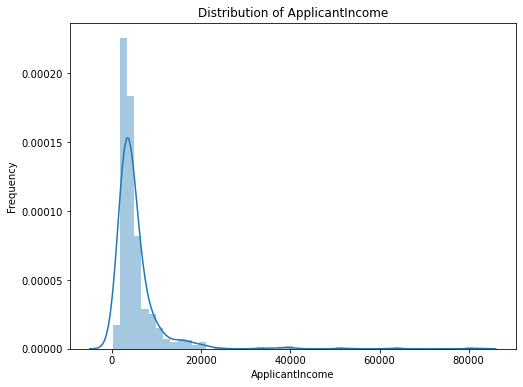

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


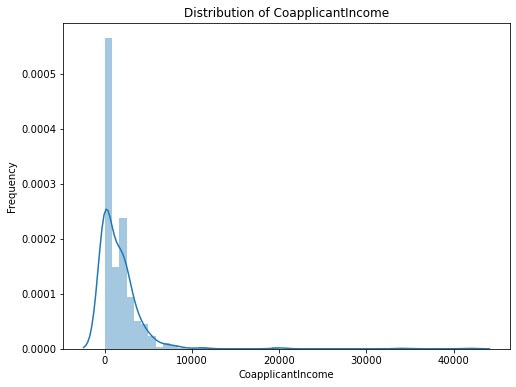

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


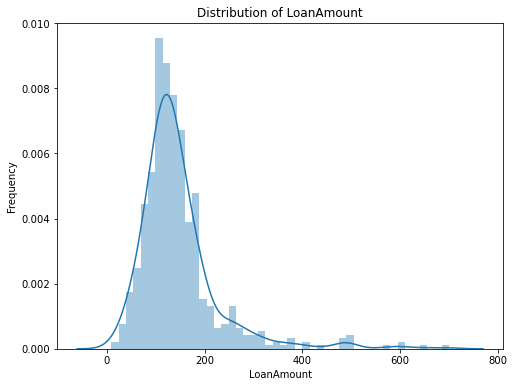

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


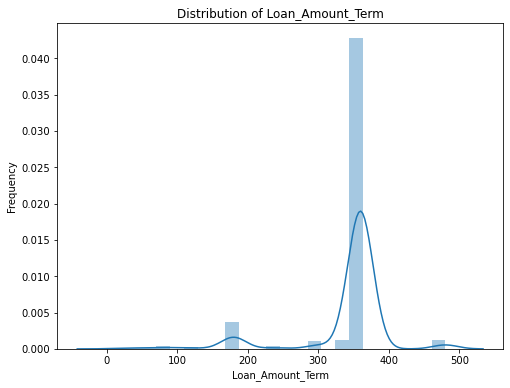

In [352]:
# Check if the columns exist in 'data'
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


for col in cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.distplot(data[col], kde=True)  # Use kde=False to hide the kernel density estimate
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


c:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


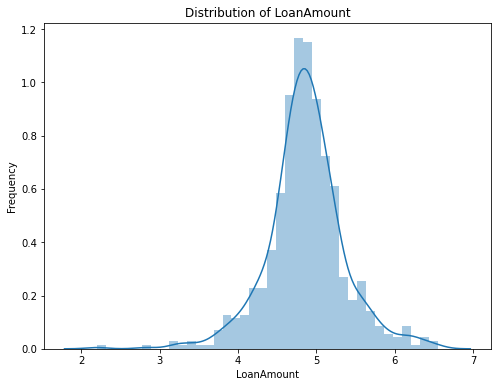

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


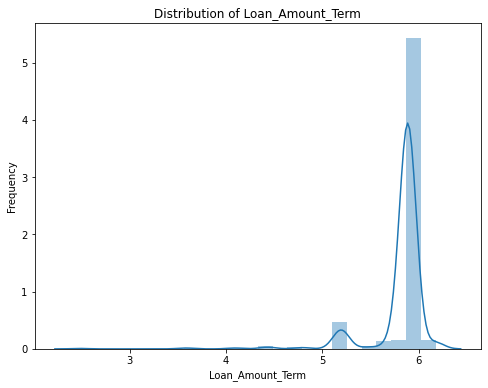

In [353]:
# Check if the columns exist in 'data'
cols = ['LoanAmount', 'Loan_Amount_Term']


for col in cols:
    data[col] = np.log(data[col])
    # data[col] = np.exp(data[col])
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.distplot((data[col]), kde=True)  # Use kde=False to hide the kernel density estimate
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


c:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

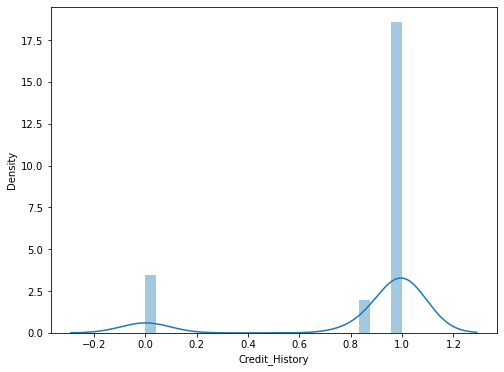

In [354]:
plt.figure(figsize=(8, 6))
sns.distplot(data['Credit_History'])

<AxesSubplot:xlabel='Gender', ylabel='Count'>

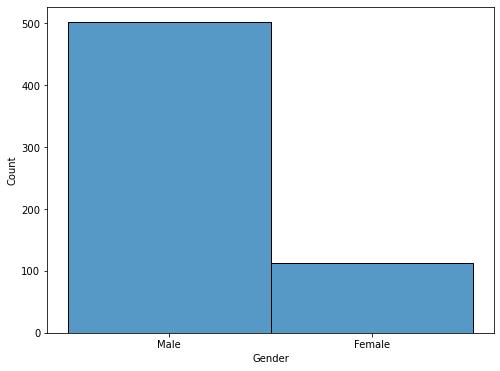

In [355]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Gender'])

In [356]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,4.986426,5.886104,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,5.886104,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,5.886104,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,4.787492,5.886104,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,4.948760,5.886104,1.0,Urban,Y,6000.0


In [357]:
data['ApplicantIncomeLog'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncomeLog'] = np.log(data['CoapplicantIncome'])
data['LoanAmountLog'] = np.log(data['LoanAmount'])
data['Loan_Amount_Term_Log'] = np.log(data['Loan_Amount_Term'])
data['Total_Income_Log'] = np.log(data['Total_Income'])

c:\Users\Admin\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

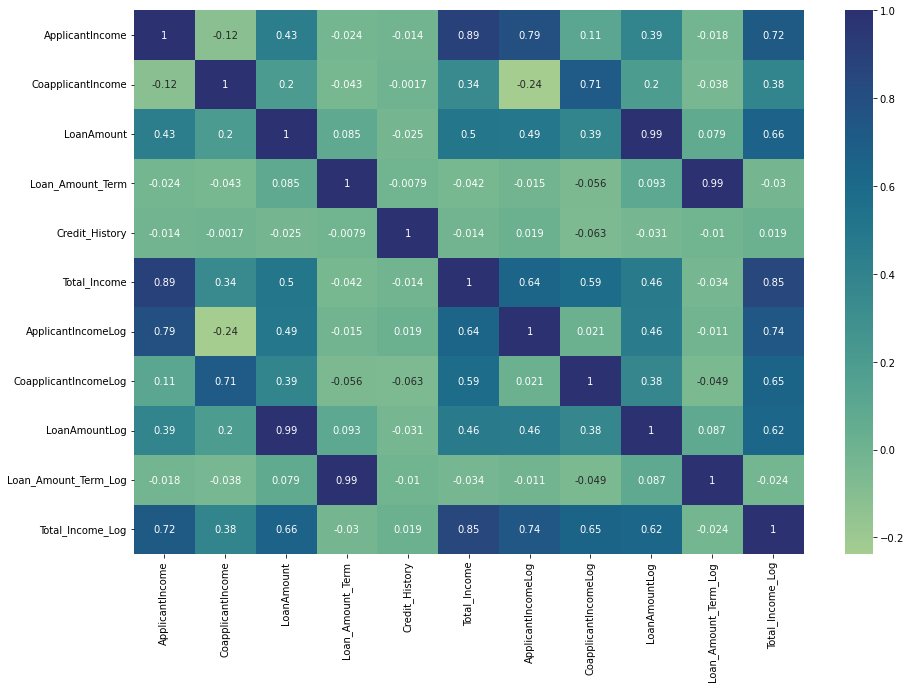

In [358]:
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap = 'crest',)

In [359]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,4.986426,5.886104,1.0,Urban,Y,5849.0,8.674026,-inf,1.606719,1.772594,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,5.886104,1.0,Rural,N,6091.0,8.430109,7.318540,1.579397,1.772594,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,5.886104,1.0,Urban,Y,3000.0,8.006368,-inf,1.432618,1.772594,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,4.787492,5.886104,1.0,Urban,Y,4941.0,7.856707,7.765569,1.566007,1.772594,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,4.948760,5.886104,1.0,Urban,Y,6000.0,8.699515,-inf,1.599137,1.772594,8.699515


In [360]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income', 'Loan_ID', 'CoapplicantIncomeLog']
data = data.drop(columns = cols, axis = 1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,1.606719,1.772594,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,1.579397,1.772594,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,1.432618,1.772594,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,1.566007,1.772594,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,1.599137,1.772594,8.699515


In [361]:
data

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,1.606719,1.772594,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,1.579397,1.772594,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,1.432618,1.772594,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,1.566007,1.772594,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,1.599137,1.772594,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y,7.972466,1.449898,1.772594,7.972466
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y,8.320205,1.305323,1.647303,8.320205
611,Male,Yes,1,Graduate,No,1.0,Urban,Y,8.996157,1.710801,1.772594,9.025456
612,Male,Yes,2,Graduate,No,1.0,Urban,Y,8.933664,1.654623,1.772594,8.933664


In [362]:
cols = list(data.columns)
for i in cols:
    print(data[i].value_counts())


Male      502
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     532
Yes     82
Name: Self_Employed, dtype: int64
1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64
7.824046    9
8.430109    6
8.699515    6
7.863267    6
8.111628    5
           ..
8.084562    1
8.391176    1
8.273081    1
8.292048    1
8.933664    1
Name: ApplicantIncomeLog, Length: 505, dtype: int64
1.606719    22
1.566007    20
1.547665    17
1.527180    15
1.624361    12
            ..
1.701222     1
1.680078     1
1.405493     1
1.631588     1
1.710801     1
Name: LoanAmountLog, Length: 204, dtype: int64
1.772594    512
1.647303     44
1.820312     15
1.763842     1

In [363]:
cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']
le = LabelEncoder()
for col in cols:
    data[col] = le.fit_transform(data[col])
# cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents','Loan_Status']

# # Use get_dummies to create dummy variables
# data = pd.get_dummies(data, columns=cols, drop_first=True)


In [364]:
data.head(20)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.000000,2,1,8.674026,1.606719,1.772594,8.674026
1,1,1,1,0,0,1.000000,0,0,8.430109,1.579397,1.772594,8.714568
2,1,1,0,0,1,1.000000,2,1,8.006368,1.432618,1.772594,8.006368
3,1,1,0,1,0,1.000000,2,1,7.856707,1.566007,1.772594,8.505323
4,1,0,0,0,0,1.000000,2,1,8.699515,1.599137,1.772594,8.699515
5,1,1,2,0,1,1.000000,2,1,8.597297,1.720487,1.772594,9.170872
6,1,1,0,1,0,1.000000,2,1,7.754910,1.515979,1.772594,8.255569
7,1,1,3,0,0,0.000000,1,0,8.018296,1.621879,1.772594,8.619750
8,1,1,2,0,0,1.000000,2,1,8.295549,1.633928,1.772594,8.618305
9,1,1,1,0,0,1.000000,1,0,9.460398,1.767308,1.772594,10.077819


In [365]:
X = data.drop('Loan_Status',axis=1)
y = data.Loan_Status
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,8.674026,1.606719,1.772594,8.674026
1,1,1,1,0,0,1.0,0,8.430109,1.579397,1.772594,8.714568
2,1,1,0,0,1,1.0,2,8.006368,1.432618,1.772594,8.006368
3,1,1,0,1,0,1.0,2,7.856707,1.566007,1.772594,8.505323
4,1,0,0,0,0,1.0,2,8.699515,1.599137,1.772594,8.699515
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,7.972466,1.449898,1.772594,7.972466
610,1,1,3,0,0,1.0,0,8.320205,1.305323,1.647303,8.320205
611,1,1,1,0,0,1.0,2,8.996157,1.710801,1.772594,9.025456
612,1,1,2,0,0,1.0,2,8.933664,1.654623,1.772594,8.933664


In [366]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [367]:
def cross_score(model , x ,y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
    model.fit(X_train,y_train)
    print("Accuracy : ",model.score(X_test,y_test)*100)
    print("accuracy_score : ",accuracy_score(y_test,model.predict(X_test))*100)
    score = cross_val_score(model,x,y,cv=5)
    print("cross_val_score : ", np.mean(score))


In [368]:
models = [LogisticRegression() , SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

for i in models:
    print("model : ",i)
    cross_score(i,X,y)
    print()

model :  LogisticRegression()


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy :  79.80295566502463
accuracy_score :  79.80295566502463


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

cross_val_score :  0.809462881514061

model :  SVC()
Accuracy :  64.5320197044335
accuracy_score :  64.5320197044335
cross_val_score :  0.7736771957883514

model :  DecisionTreeClassifier()
Accuracy :  70.44334975369459
accuracy_score :  70.44334975369459
cross_val_score :  0.7150206584033053

model :  RandomForestClassifier()
Accuracy :  80.78817733990148
accuracy_score :  80.78817733990148
cross_val_score :  0.7736638677862189



In [369]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

<AxesSubplot:>

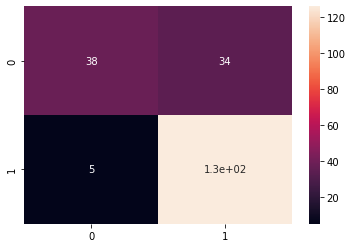

In [370]:
predictions = model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,predictions),annot= True)

In [371]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.53      0.66        72
           1       0.79      0.96      0.87       131

    accuracy                           0.81       203
   macro avg       0.84      0.74      0.76       203
weighted avg       0.82      0.81      0.79       203



In [372]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status', 'ApplicantIncomeLog',
       'LoanAmountLog', 'Loan_Amount_Term_Log', 'Total_Income_Log'],
      dtype='object')

In [373]:
# Male,Yes,0,Graduate,No,5720,0,110,360,1,Urban
data

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674026,1.606719,1.772594,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,1.579397,1.772594,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,1.432618,1.772594,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,1.566007,1.772594,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,1.599137,1.772594,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,1,7.972466,1.449898,1.772594,7.972466
610,1,1,3,0,0,1.0,0,1,8.320205,1.305323,1.647303,8.320205
611,1,1,1,0,0,1.0,2,1,8.996157,1.710801,1.772594,9.025456
612,1,1,2,0,0,1.0,2,1,8.933664,1.654623,1.772594,8.933664


In [377]:
cols = list(data.columns)
# for i in cols:
#     print(data[i].value_counts())
# print(len(cols))
X_train

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
244,1,1,0,1,0,1.0,1,8.133294,1.571151,1.772594,8.964823
393,1,1,2,1,0,1.0,1,7.597396,1.553373,1.647303,8.193677
310,0,0,0,0,0,1.0,1,7.978311,1.488584,1.772594,7.978311
408,1,1,1,0,0,0.0,1,9.024011,1.614203,1.741130,9.024011
572,1,1,2,0,0,1.0,2,9.721126,1.725757,1.772594,9.721126
...,...,...,...,...,...,...,...,...,...,...,...
71,1,1,2,1,1,1.0,1,7.536364,1.520544,1.772594,8.229511
106,1,1,2,0,0,1.0,2,9.342859,1.689376,1.772594,9.436918
270,0,0,0,0,0,1.0,2,8.082402,1.224128,1.772594,8.082402
435,0,2,0,0,0,1.0,1,9.215029,1.606719,1.701222,9.215029


In [378]:
# Check the feature importances used by the RandomForestClassifier
feature_importances = model.feature_importances_

# Print the feature importances and their corresponding column names
for feature_name, importance in zip(X.columns, feature_importances):
    print(f"{feature_name}: {importance}")


Gender: 0.021502853085698985
Married: 0.026694450319435924
Dependents: 0.042335334027685634
Education: 0.021891232636005925
Self_Employed: 0.01754320617941404
Credit_History: 0.24515376055138596
Property_Area: 0.047756364870732954
ApplicantIncomeLog: 0.1782386710234527
LoanAmountLog: 0.1587375271369161
Loan_Amount_Term_Log: 0.04886766250262639
Total_Income_Log: 0.19127893766664525


In [389]:
# Corrected sample data for prediction
sample_data = {
    'Gender': 1,            # 1 for Male, 0 for Female
    'Married': 0,           # 1 for Yes, 0 for No
    'Dependents': 2,        # Number of dependents
    'Education': 1,         # 1 for Graduate, 0 for Not Graduate
    'Self_Employed': 0,     # 1 for Yes, 0 for No
    'Credit_History': 1,    # 1 for Good credit history, 0 for Bad credit history
    'Property_Area': 2,     # Property area (0 for Rural, 1 for Semiurban, 2 for Urban)
    'ApplicantIncomeLog': np.log(1000),        # Log-transformed Applicant's Income
    'LoanAmountLog': np.log(18950),              # Log-transformed Loan Amount
    'Loan_Amount_Term_Log': np.log(360),       # Log-transformed Loan Amount Term
    'Total_Income_Log': np.log(1500)           # Log-transformed Total Income
}

# Create a DataFrame from the corrected sample data
sample_df = pd.DataFrame([sample_data])

# Make predictions using the trained model
predictions = model.predict(sample_df)

# Convert predictions to human-readable labels
predicted_labels = ['Approved' if prediction == 1 else 'Not Approved' for prediction in predictions]

# Print the predicted labels
print("Loan Status Predictions:")
print(predicted_labels[0])


Loan Status Predictions:
Not Approved


In [384]:
with open('model.pickle','wb') as f:
    pickle.dump(model,f)